In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plots
sns.set(style='whitegrid')
%matplotlib inline


In [3]:
import os
os.getcwd()


'C:\\Users\\JHINKAN MAURYA\\ansel'

In [8]:
import pandas as pd

df = pd.read_csv("acquisitions.csv")
df.head()


,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [7]:
import os
os.listdir()


[' Startup_Funding_Analysis..ipynb',
 '.ipynb_checkpoints',
 'acquisitions.csv',
 'degrees.csv',
 'funding_rounds.csv',
 'funds.csv',
 'investments.csv',
 'IPL_Analysis.ipynb',
 'ipos.csv',
 'migrated',
 'milestones.csv',
 'objects.csv',
 'offices.csv',
 'people.csv',
 'pr2.ipynb',
 'relationships.csv',
 'Untitled.ipynb']

In [9]:
# Check shape
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:")
print(df.columns)

# Data types and non-null info
print("\nInfo:")
print(df.info())

# Summary of numeric columns (if any)
print("\nSummary statistics:")
print(df.describe())


Shape of dataset: (9562, 12)

Column names:
Index(['id', 'acquisition_id', 'acquiring_object_id', 'acquired_object_id',
       'term_code', 'price_amount', 'price_currency_code', 'acquired_at',
       'source_url', 'source_description', 'created_at', 'updated_at'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9562 non-null   int64  
 1   acquisition_id       9562 non-null   int64  
 2   acquiring_object_id  9562 non-null   object 
 3   acquired_object_id   9561 non-null   object 
 4   term_code            1906 non-null   object 
 5   price_amount         9562 non-null   float64
 6   price_currency_code  9558 non-null   object 
 7   acquired_at          9533 non-null   object 
 8   source_url           8566 non-null   object 
 9   source_description   8590 non-null   object

In [13]:
funding_df = pd.read_csv("funding_rounds.csv")
funding_df.head()
funding_df.shape
funding_df.columns

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [14]:

funding_df_cleaned = funding_df[[
    'object_id', 
    'funded_at', 
    'funding_round_type', 
    'raised_amount_usd'
]]

funding_df_cleaned.head()


,object_id,funded_at,funding_round_type,raised_amount_usd
0,c:4,2006-12-01,series-b,8500000.0
1,c:5,2004-09-01,angel,500000.0
2,c:5,2005-05-01,series-a,12700000.0
3,c:5,2006-04-01,series-b,27500000.0
4,c:7299,2006-05-01,series-b,10500000.0


In [15]:
funding_df_cleaned.isnull().sum()


object_id               0
funded_at             248
funding_round_type      0
raised_amount_usd       0
dtype: int64

In [16]:
funding_df_cleaned = funding_df_cleaned.dropna(subset=['funded_at'])
funding_df_cleaned.isnull().sum()


object_id             0
funded_at             0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [17]:
funding_df_cleaned['funded_at'] = pd.to_datetime(funding_df_cleaned['funded_at'], errors='coerce')
funding_df_cleaned['funding_year'] = funding_df_cleaned['funded_at'].dt.year
funding_df_cleaned[['funded_at', 'funding_year']].head()


,funded_at,funding_year
0,2006-12-01,2006
1,2004-09-01,2004
2,2005-05-01,2005
3,2006-04-01,2006
4,2006-05-01,2006


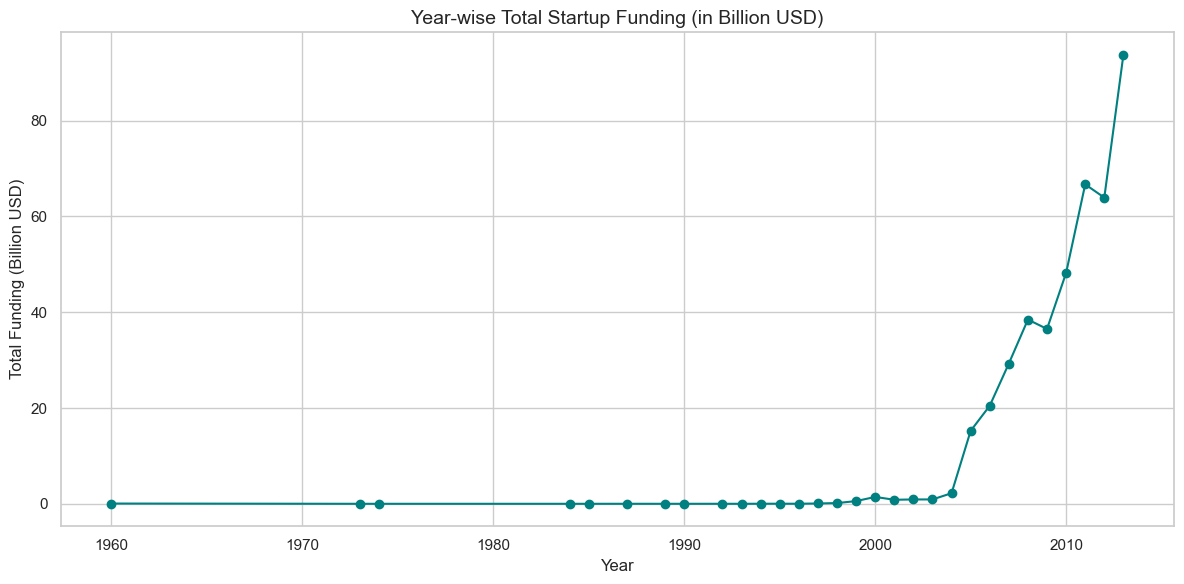

In [18]:
import matplotlib.pyplot as plt

yearly_funding = funding_df_cleaned.groupby('funding_year')['raised_amount_usd'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_funding['funding_year'], yearly_funding['raised_amount_usd'] / 1e9, marker='o', color='teal')
plt.title('Year-wise Total Startup Funding (in Billion USD)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Funding (Billion USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
relationships_df = pd.read_csv("relationships.csv")
relationships_df.columns



Index(['id', 'relationship_id', 'person_object_id', 'relationship_object_id',
       'start_at', 'end_at', 'is_past', 'sequence', 'title', 'created_at',
       'updated_at'],
      dtype='object')

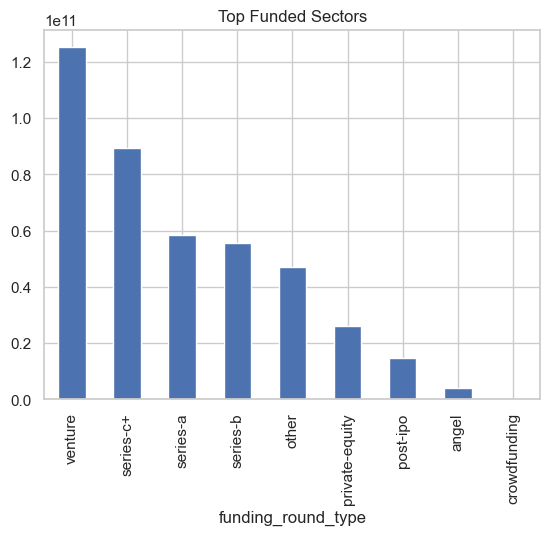

In [33]:
top_sectors = funding_df.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)
top_sectors.plot(kind='bar', title='Top Funded Sectors')
plt.show()

In [22]:
relationships_df = pd.read_csv("relationships.csv")
investors_df = relationships_df[relationships_df['title'].str.contains('investor', case=False, na=False)]
print("Investor-related entries found:", len(investors_df))


Investor-related entries found: 4947


In [23]:
top_investor_ids = investors_df['person_object_id'].value_counts().head(10)
print(top_investor_ids)


person_object_id
p:35257     61
p:21670     50
p:100628    46
p:3244      44
p:7554      28
p:166507    27
p:213170    24
p:23290     23
p:3729      23
p:17870     22
Name: count, dtype: int64


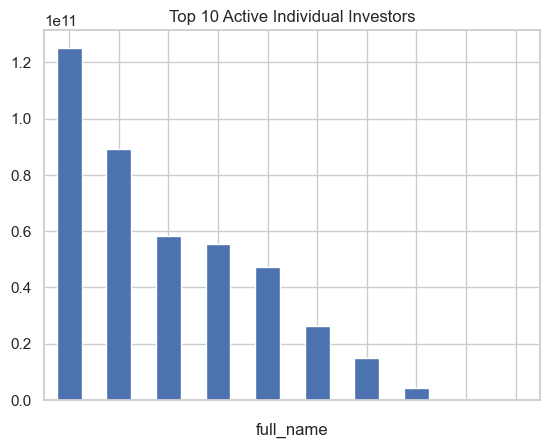

In [26]:

top_ids_df['person_object_id'] = top_ids_df['person_object_id'].astype(str)
people_df['id'] = people_df['id'].astype(str)

top_ids_df = top_investor_ids.reset_index()
top_ids_df.columns = ['person_object_id', 'count']

top_investors_named = top_ids_df.merge(people_df, left_on='person_object_id', right_on='id', how='left')

top_investors_named['full_name'] = top_investors_named['first_name'].fillna('') + ' ' + top_investors_named['last_name'].fillna('')
top_investors_named.set_index('full_name')['count'].plot(kind='bar', title='Top 10 Active Individual Investors')
plt.show()

C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_13920\2986476331.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv('objects.csv')


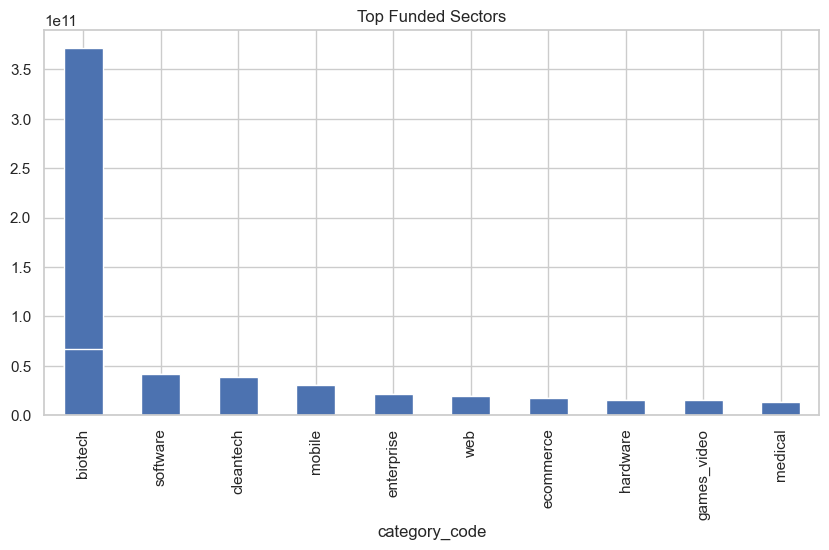

In [30]:
# Merge funding with company category info
objects_df = pd.read_csv('objects.csv')
objects_df = objects_df[['id', 'category_code']]
objects_df.rename(columns={'id': 'object_id'}, inplace=True)

# Ensure type match
funding_df['object_id'] = funding_df['object_id'].astype(str)
objects_df['object_id'] = objects_df['object_id'].astype(str)

# Merge and group
merged_df = funding_df.merge(objects_df, on='object_id', how='left')
sector_funding = merged_df.groupby('category_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

# Plot
sector_funding.plot(kind='bar', title='Top Funded Sectors', figsize=(10,5))
plt.show()

C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_13920\311590919.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv('objects.csv')[['id', 'name']]


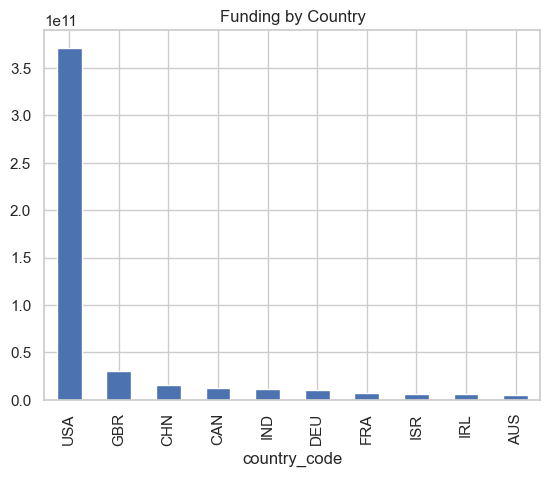

In [32]:
offices_df = pd.read_csv('offices.csv')
objects_df = pd.read_csv('objects.csv')[['id', 'name']]
offices_df = offices_df[['object_id', 'country_code', 'city']]

# Merge and group
funding_with_country = funding_df.merge(offices_df, left_on='object_id', right_on='object_id', how='left')
funding_by_country = funding_with_country.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

# Plot
funding_by_country.plot(kind='bar', title='Funding by Country')
plt.show()

In [4]:
import pandas as pd
objects_df = pd.read_csv("objects.csv")

objects_df.head(), objects_df.columns


C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_8604\3532212631.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv("objects.csv")


(        id entity_type  entity_id parent_id                name  \
 0      c:1     Company          1       NaN            Wetpaint   
 1     c:10     Company         10       NaN             Flektor   
 2    c:100     Company        100       NaN               There   
 3  c:10000     Company      10000       NaN             MYWEBBO   
 4  c:10001     Company      10001       NaN  THE Movie Streamer   
 
       normalized_name                    permalink    category_code  \
 0            wetpaint            /company/wetpaint              web   
 1             flektor             /company/flektor      games_video   
 2               there               /company/there      games_video   
 3             mywebbo             /company/mywebbo  network_hosting   
 4  the movie streamer  /company/the-movie-streamer      games_video   
 
       status  founded_at  ... last_funding_at funding_rounds  \
 0  operating  2005-10-17  ...      2008-05-19              3   
 1   acquired         NaN 

C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_8604\525042019.py:5: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv("objects.csv")


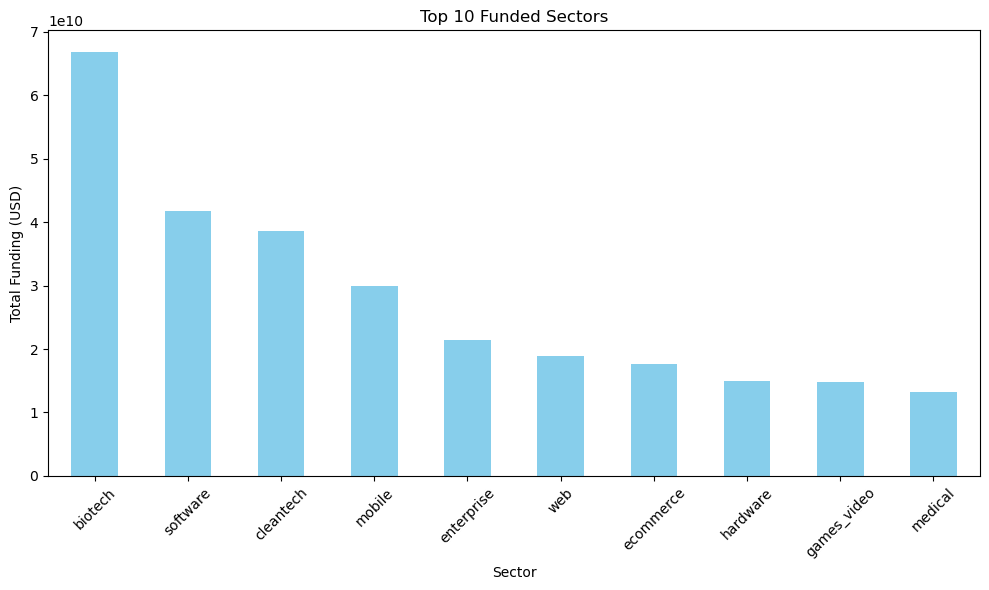

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

funding_df = pd.read_csv("funding_rounds.csv")
objects_df = pd.read_csv("objects.csv")

merged_df = funding_df.merge(objects_df[['id', 'category_code']], 
                             left_on='object_id', 
                             right_on='id', 
                             how='left')

sector_funding = merged_df.groupby('category_code')['raised_amount_usd'] \
                          .sum() \
                          .sort_values(ascending=False) \
                          .head(10)

plt.figure(figsize=(10, 6))
sector_funding.plot(kind='bar', color='skyblue')
plt.title("Top 10 Funded Sectors")
plt.xlabel("Sector")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: ylabel='category_code'>

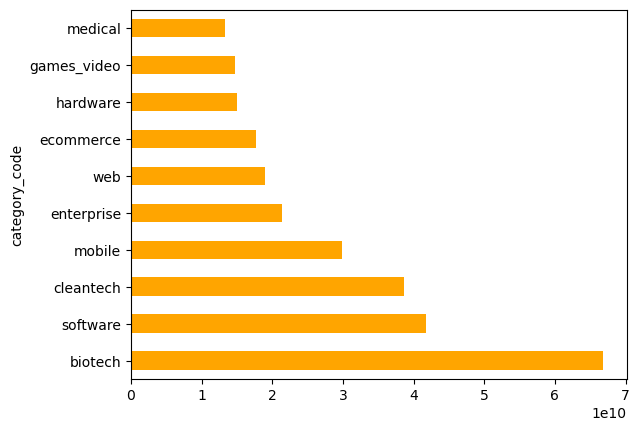

In [6]:
sector_funding.plot(kind='barh', color='orange')


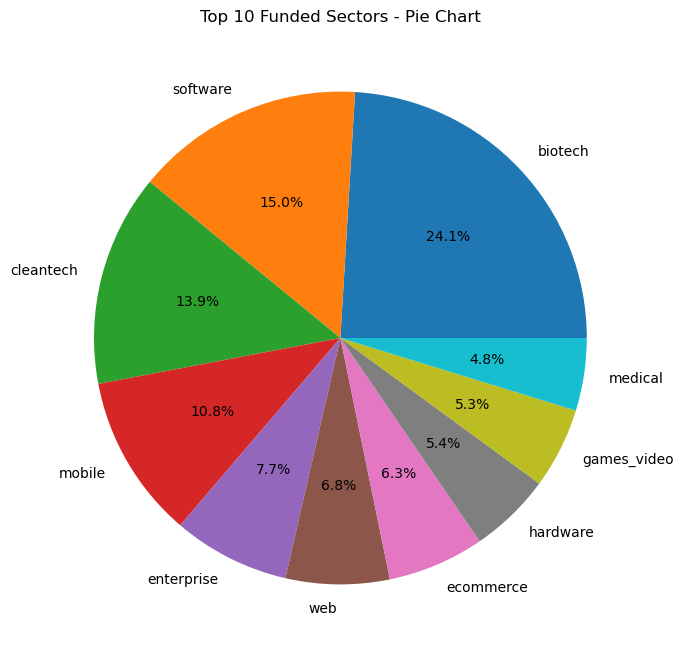

In [9]:
sector_funding.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel("")  # Removes y-label
plt.title("Top 10 Funded Sectors - Pie Chart")
plt.show()

In [10]:
relationships_df = pd.read_csv("relationships.csv")
objects_df = pd.read_csv("objects.csv")

C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_8604\4039806019.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv("objects.csv")


In [11]:
merged_df = relationships_df.merge(
    objects_df[['id', 'name']],
    left_on='person_object_id',
    right_on='id',
    how='inner'
)


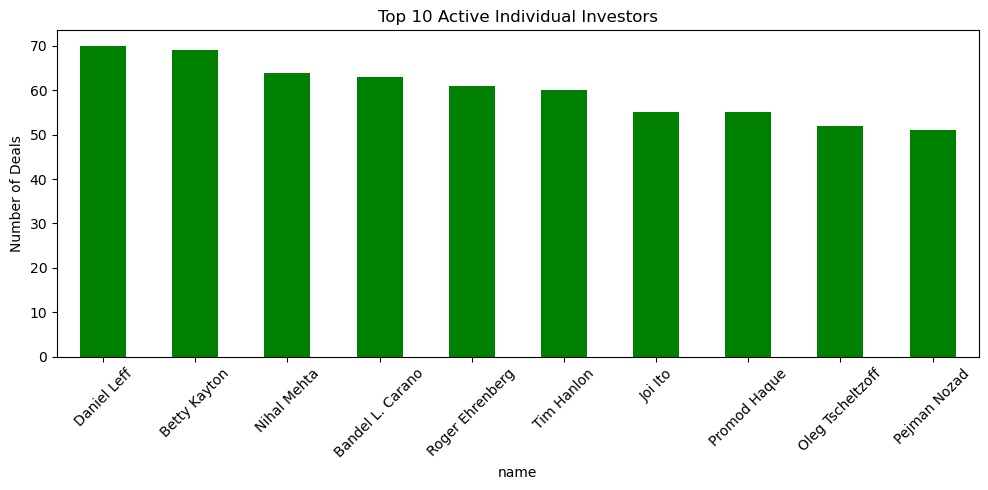

In [16]:
top_investors = merged_df['name'].value_counts().head(10)
top_investors.plot(kind='bar', title='Top 10 Active Individual Investors', figsize=(10,5), color='green')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_8604\4276659365.py:3: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv("objects.csv")


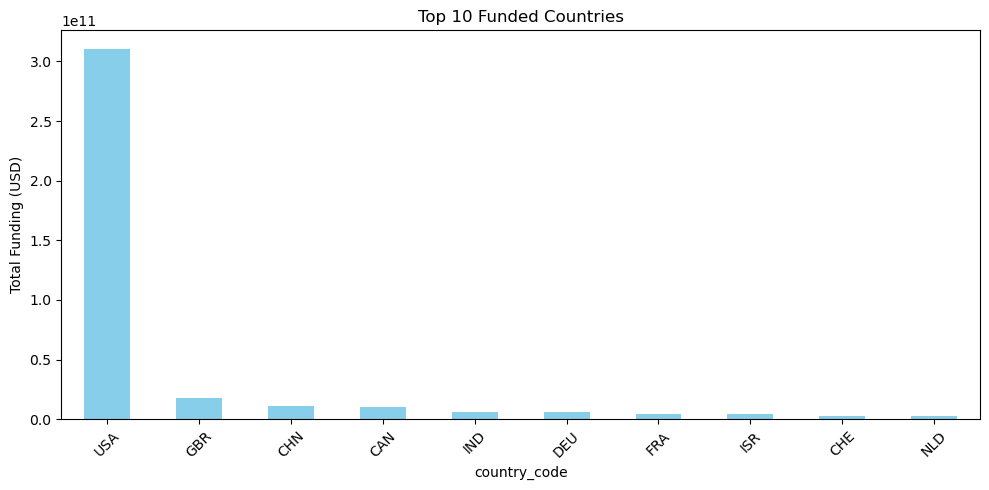

In [17]:
funding_df = pd.read_csv("funding_rounds.csv")
objects_df = pd.read_csv("objects.csv")

merged_geo = funding_df.merge(objects_df[['id', 'country_code', 'city']], 
                               left_on='object_id', right_on='id', how='left')

country_funding = merged_geo.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

country_funding.plot(kind='bar', title='Top 10 Funded Countries', figsize=(10,5), color='skyblue')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


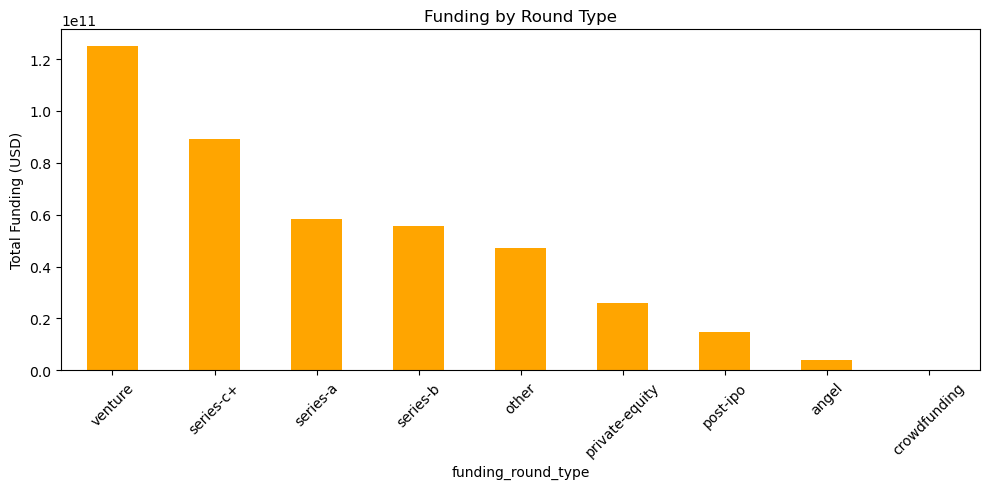

In [18]:
round_type_funding = funding_df.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

round_type_funding.plot(kind='bar', 
                        title='Funding by Round Type', 
                        figsize=(10,5), 
                        color='orange')

plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


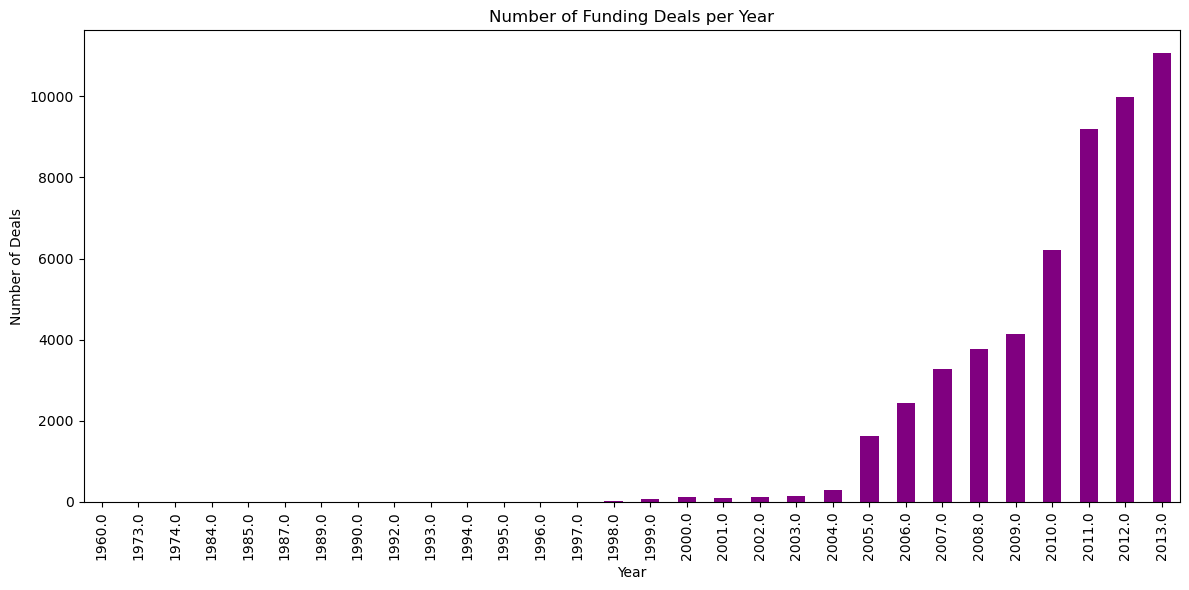

In [19]:
# First, convert 'funded_at' column to datetime
funding_df['funded_at'] = pd.to_datetime(funding_df['funded_at'], errors='coerce')

# Create a new column for year
funding_df['funding_year'] = funding_df['funded_at'].dt.year

# Count number of deals per year
deals_per_year = funding_df['funding_year'].value_counts().sort_index()

# Plot
deals_per_year.plot(kind='bar',
                    figsize=(12,6),
                    color='purple',
                    title='Number of Funding Deals per Year')

plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.tight_layout()
plt.show()

In [24]:
import os
os.listdir()

[' Startup_Funding_Analysis..ipynb',
 '.ipynb_checkpoints',
 'acquisitions.csv',
 'degrees.csv',
 'funding_rounds.csv',
 'funds.csv',
 'investments.csv',
 'IPL_Analysis.ipynb',
 'ipos.csv',
 'migrated',
 'milestones.csv',
 'objects.csv',
 'offices.csv',
 'people.csv',
 'pr2.ipynb',
 'relationships.csv',
 'Untitled.ipynb']

In [25]:
import pandas as pd

objects_df = pd.read_csv('objects.csv')

companies_df = objects_df[objects_df['entity_type'] == 'Company']

companies_df[['id', 'name', 'category_code']].head()

C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_8604\380849579.py:4: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv('objects.csv')


,id,name,category_code
0,c:1,Wetpaint,web
1,c:10,Flektor,games_video
2,c:100,There,games_video
3,c:10000,MYWEBBO,network_hosting
4,c:10001,THE Movie Streamer,games_video


In [27]:
merged_df = funding_df.merge(companies_df[['id', 'category_code']], left_on='object_id', right_on='id', how='left')
top_sectors = merged_df.groupby('category_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

In [28]:
top_sectors


category_code
biotech        6.686868e+10
software       4.176832e+10
cleantech      3.867019e+10
mobile         2.989867e+10
enterprise     2.134636e+10
web            1.891835e+10
ecommerce      1.762815e+10
hardware       1.496217e+10
games_video    1.472512e+10
medical        1.323517e+10
Name: raised_amount_usd, dtype: float64

In [29]:
top_sectors.reset_index().rename(columns={'raised_amount_usd': 'Total Funding (USD)'})

,category_code,Total Funding (USD)
0,biotech,6.686868e+10
1,software,4.176832e+10
2,cleantech,3.867019e+10
3,mobile,2.989867e+10
4,enterprise,2.134636e+10
5,web,1.891835e+10
6,ecommerce,1.762815e+10
7,hardware,1.496217e+10
8,games_video,1.472512e+10
9,medical,1.323517e+10


In [32]:
merged_df = funding_df.merge(companies_df[['id', 'category_code']], left_on='object_id', right_on='id', how='left')

top_sectors = merged_df.groupby('category_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)


In [33]:
funding_type_df = funding_df.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

print(funding_type_df)

funding_round_type
venture           1.251905e+11
series-c+         8.923834e+10
series-a          5.838949e+10
series-b          5.549725e+10
other             4.721534e+10
private-equity    2.609696e+10
post-ipo          1.473819e+10
angel             4.022867e+09
crowdfunding      1.818688e+08
Name: raised_amount_usd, dtype: float64


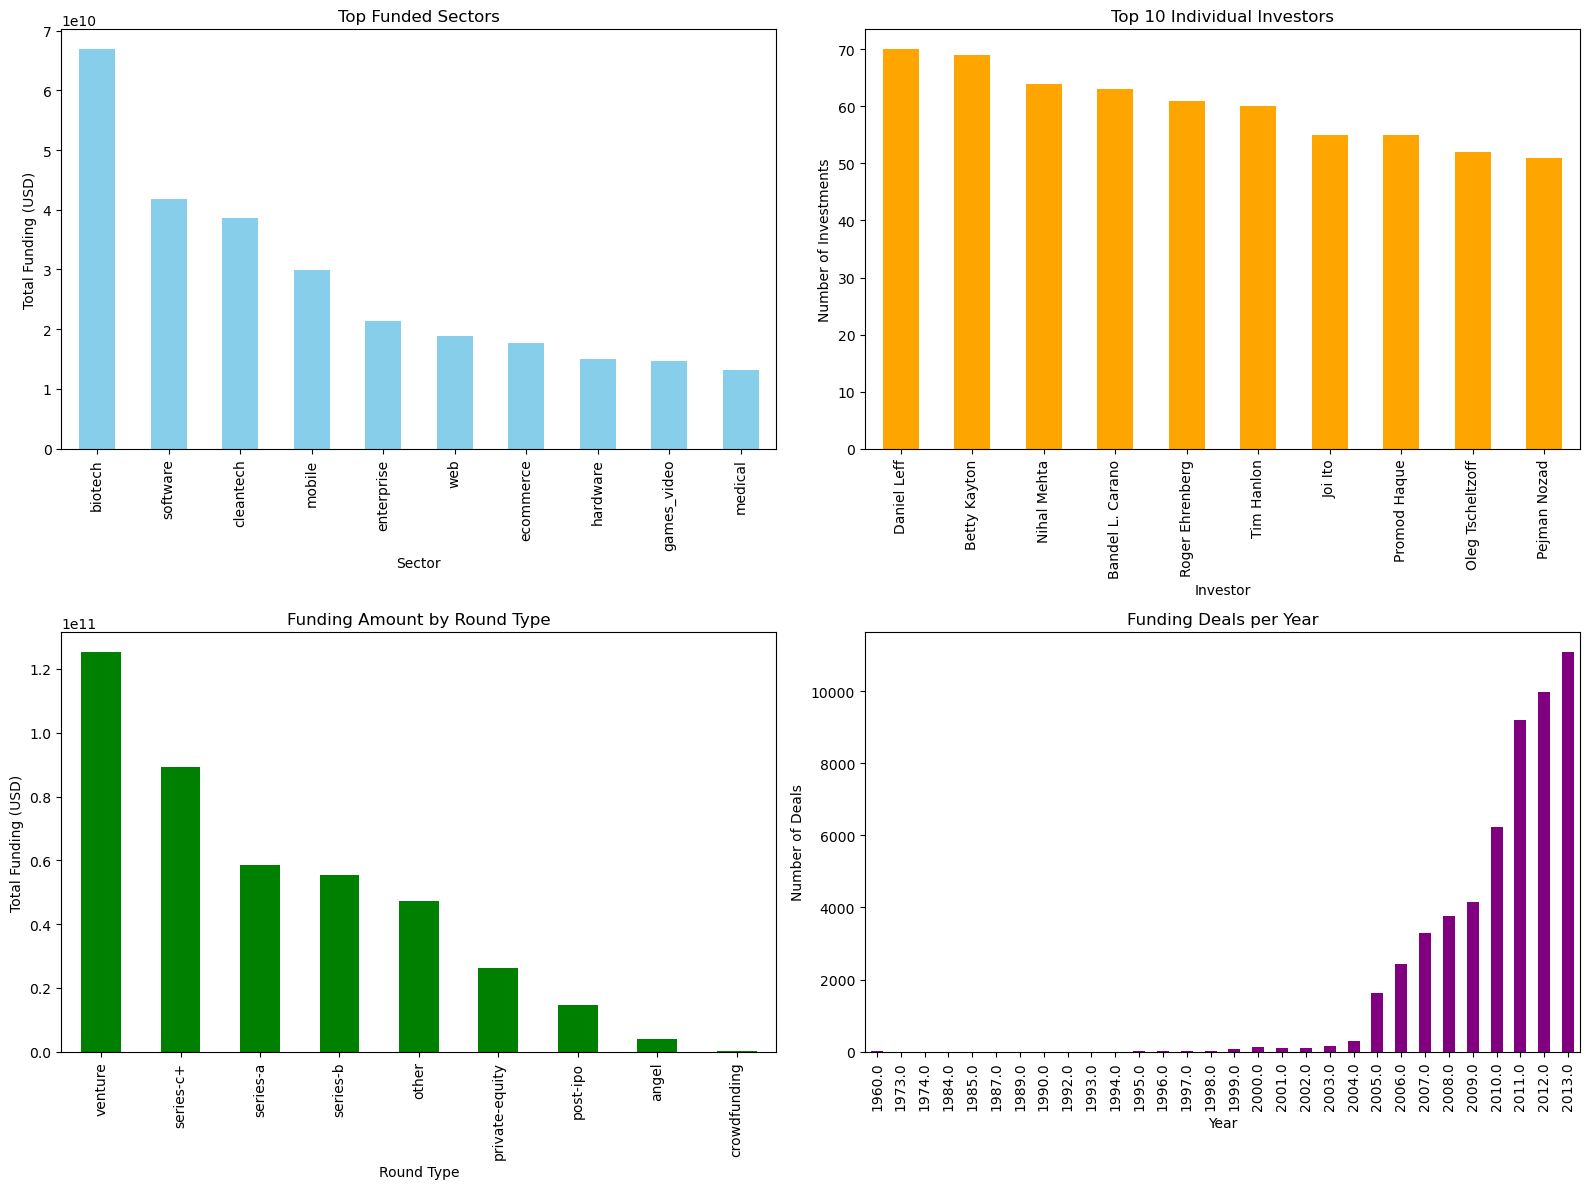

In [34]:
import matplotlib.pyplot as plt

# Set figure size and layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# --- Top Funded Sectors ---
top_sectors.plot(kind='bar',
                 ax=axs[0, 0],
                 color='skyblue',
                 title='Top Funded Sectors')
axs[0, 0].set_xlabel('Sector')
axs[0, 0].set_ylabel('Total Funding (USD)')

# --- Most Active Individual Investors ---
top_investors.plot(kind='bar',
                   ax=axs[0, 1],
                   color='orange',
                   title='Top 10 Individual Investors')
axs[0, 1].set_xlabel('Investor')
axs[0, 1].set_ylabel('Number of Investments')

# --- Funding Round Types ---
funding_type_df.plot(kind='bar',
                     ax=axs[1, 0],
                     color='green',
                     title='Funding Amount by Round Type')
axs[1, 0].set_xlabel('Round Type')
axs[1, 0].set_ylabel('Total Funding (USD)')

# --- Number of Deals per Year ---
deals_per_year.plot(kind='bar',
                    ax=axs[1, 1],
                    color='purple',
                    title='Funding Deals per Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Deals')

# Layout adjust
plt.tight_layout()
plt.show()

In [35]:
objects_df = pd.read_csv('objects.csv')

merged_location_df = funding_df.merge(objects_df[['id', 'country_code', 'city']], 
                                      left_on='object_id', right_on='id', how='left')

C:\Users\JHINKAN MAURYA\AppData\Local\Temp\ipykernel_8604\3716225488.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv('objects.csv')


In [37]:
funding_by_country = merged_location_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

print(funding_by_country)

country_code
USA    3.105884e+11
GBR    1.770562e+10
CHN    1.068974e+10
CAN    9.866362e+09
IND    6.141410e+09
DEU    5.765774e+09
FRA    4.595138e+09
ISR    4.480092e+09
CHE    2.829253e+09
NLD    2.353969e+09
Name: raised_amount_usd, dtype: float64


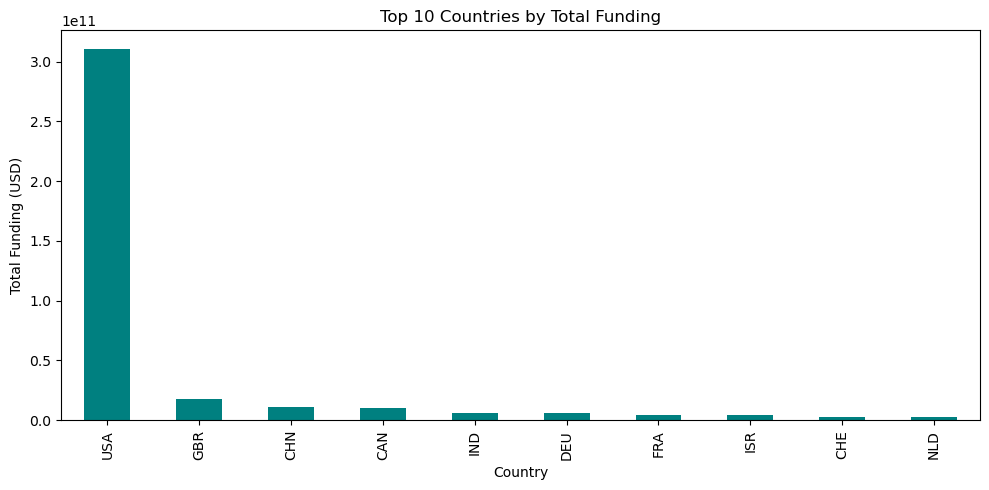

In [38]:
funding_by_country.plot(kind='bar', 
                        figsize=(10, 5), 
                        color='teal', 
                        title='Top 10 Countries by Total Funding')

plt.xlabel('Country')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
plt.show()


In [39]:
merged_location_df[['country_code', 'raised_amount_usd']].isnull().sum()


country_code         2746
raised_amount_usd       0
dtype: int64

In [40]:
merged_location_df.dropna(subset=['country_code', 'raised_amount_usd'])['country_code'].nunique()


118

In [42]:
merged_location_df['country_code'].value_counts(dropna=False).head(15)


country_code
USA    36184
GBR     2957
NaN     2746
CAN     1509
DEU     1044
FRA      958
ISR      807
IND      688
ESP      536
CHN      424
SWE      368
IRL      326
AUS      323
NLD      302
ITA      294
Name: count, dtype: int64

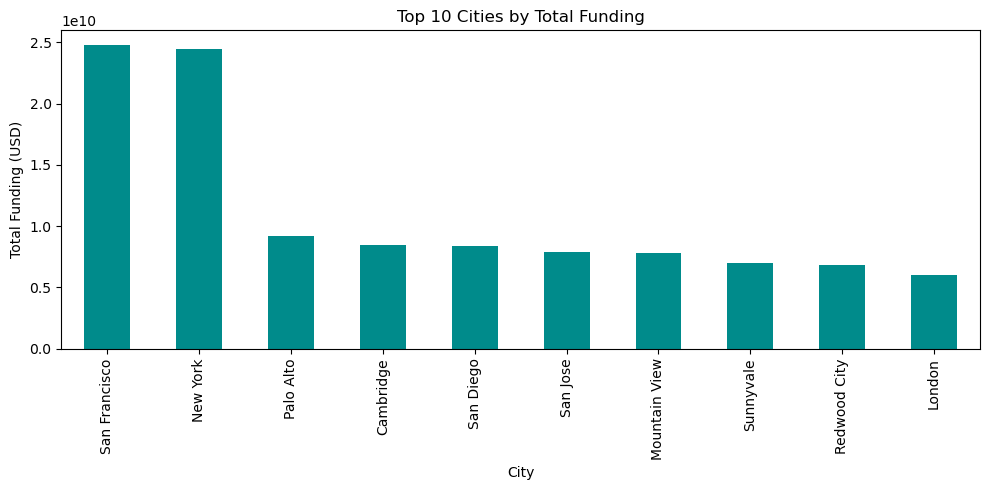

In [44]:
valid_city_df = merged_location_df.dropna(subset=['city', 'raised_amount_usd'])

funding_by_city = valid_city_df.groupby('city')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

funding_by_city.plot(kind='bar', figsize=(10, 5), color='darkcyan', title='Top 10 Cities by Total Funding')
plt.xlabel('City')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
plt.show()

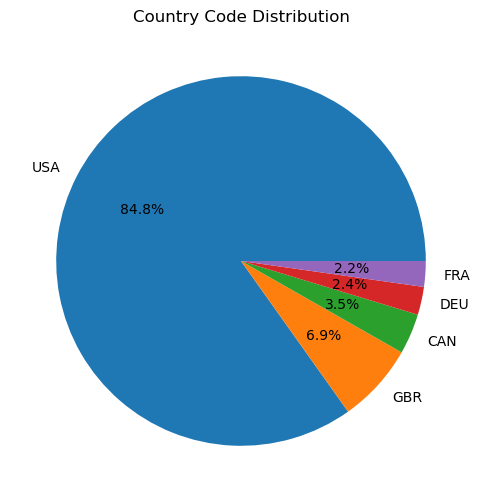

In [45]:
merged_location_df['country_code'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Country Code Distribution')
plt.ylabel('')
plt.show()
